In [ ]:
from scipy.fft import fft, fftfreq
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def spectr(image):
    imageSpect = np.fft.fft2(image)
    return imageSpect 

In [ ]:
def centr(image):
    imageSpect = np.fft.fft2(image)
    fshift = np.fft.fftshift(imageSpect)
    return fshift

In [ ]:
def decentr(image):
    imageSpect = np.fft.fft2(image)
    fshift = np.fft.fftshift(imageSpect)
    ifshift= np.fft.ifftshift(fshift)
    return ifshift



In [ ]:

def process(image):
    imageSpect = np.fft.fft2(image)
    fshift = np.fft.fftshift(imageSpect)
    ifshift= np.fft.ifftshift(fshift)
    iff = np.fft.ifft2(ifshift)
    proc = (np.abs(iff))
    return proc

<Figure size 432x288 with 0 Axes>

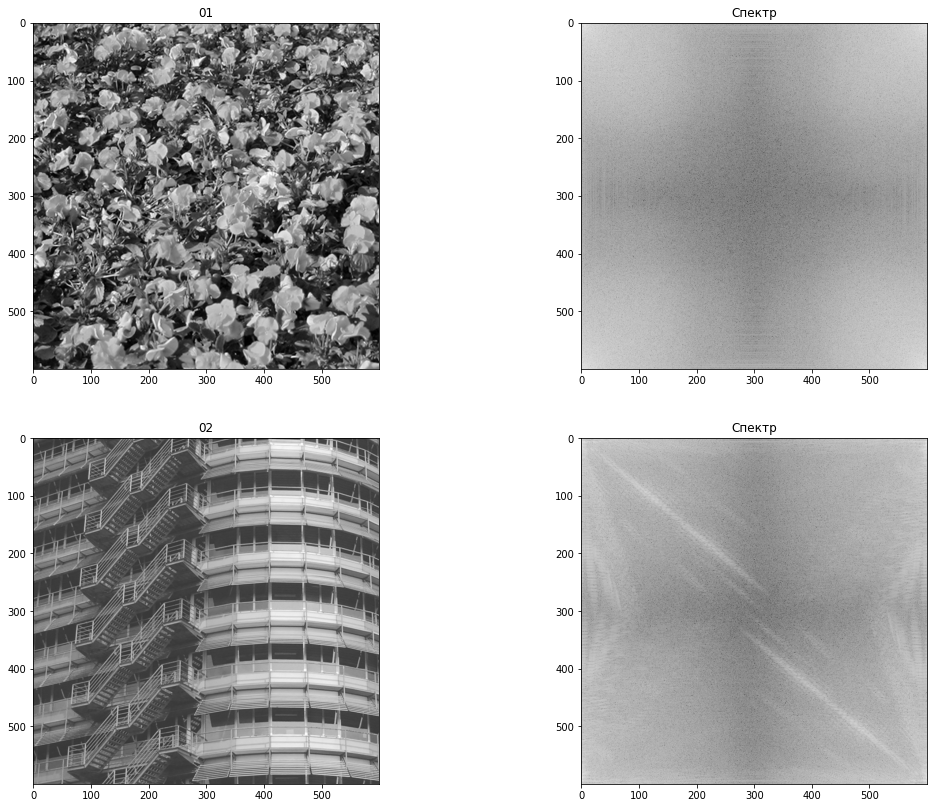

In [ ]:
fig = plt.figure()

fig, ([ax1, ax2],[ax3, ax4] ) = plt.subplots(
    nrows=2, ncols=2,
    figsize=(18, 14)
)

ax1.set_title('01')
ax2.set_title('Спектр')
ax3.set_title('02')
ax4.set_title('Спектр')

image1 = cv2.imread("/content/drive/My Drive/Обработка изображений/Практика 5/test1_5.tif") #Открываем изображение. 
img1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2 = cv2.imread("/content/drive/My Drive/Обработка изображений/Практика 5/test2_5.tif") #Открываем изображение.
img2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
image1S = spectr(img1)
image2S = spectr(img2)
ax1.imshow(image1, cmap='gray')
ax2.imshow(np.log(1+np.abs(image1S)),cmap='gray')
ax3.imshow(image2,cmap='gray')
ax4.imshow(np.log(1+np.abs(image2S)),cmap='gray')

plt.show()

<Figure size 432x288 with 0 Axes>

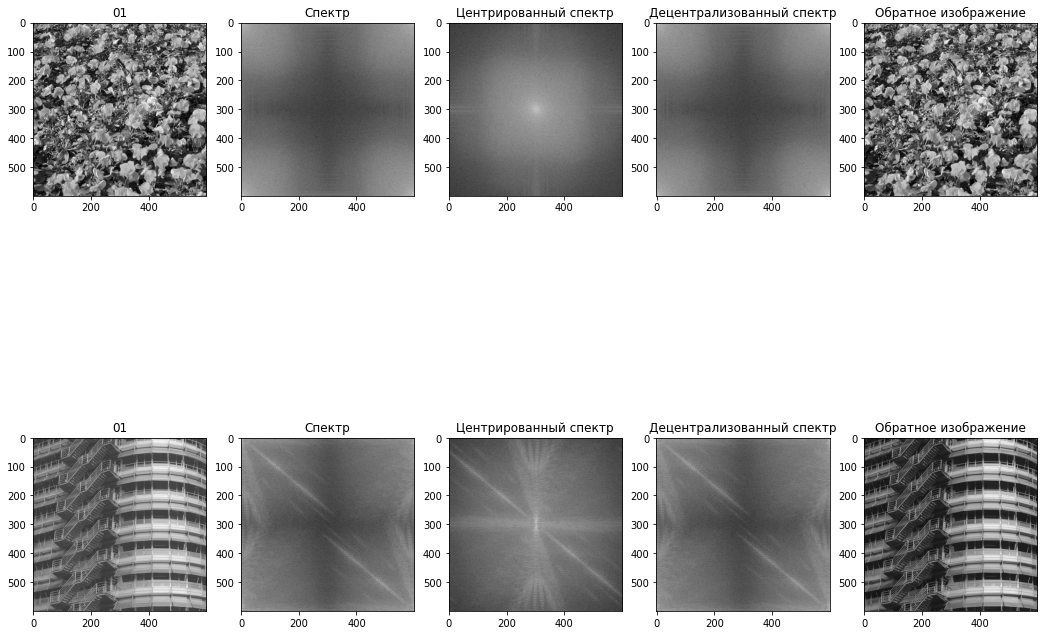

In [ ]:
fig = plt.figure()

fig, ([ax1, ax2, ax3, ax4, ax5],[ax6, ax7, ax8, ax9, ax10] ) = plt.subplots(
    nrows=2, ncols=5,
    figsize=(18, 14)
)

ax1.set_title('01')
ax2.set_title('Спектр')
ax3.set_title('Центрированный спектр')
ax4.set_title('Децентрализованный спектр')
ax5.set_title('Обратное изображение')
ax6.set_title('01')
ax7.set_title('Спектр')
ax8.set_title('Центрированный спектр')
ax9.set_title('Децентрализованный спектр')
ax10.set_title('Обратное изображение')

image1S = spectr(img1)
image1C = centr(img1)
image1D = decentr(img1)
image1P = process(img1)

image2S = spectr(img2)
image2C = centr(img2)
image2D = decentr(img2)
image2P = process(img2)

ax1.imshow(image1, cmap='gray')
ax2.imshow(np.log(1+np.abs(image1S)),cmap='gray')
ax3.imshow(np.log(1+np.abs(image1C)),cmap='gray')
ax4.imshow(np.log(1+np.abs(image1D)),cmap='gray')
ax5.imshow(image1P,cmap='gray')
ax6.imshow(image2, cmap='gray')
ax7.imshow(np.log(1+np.abs(image2S)),cmap='gray')
ax8.imshow(np.log(1+np.abs(image2C)),cmap='gray')
ax9.imshow(np.log(1+np.abs(image2D)),cmap='gray')
ax10.imshow(image2P,cmap='gray')
plt.show()


In [ ]:
def distance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def lp_filter(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base
    
def idealFilter(d, image):
    original = np.fft.fft2(image)
    center = np.fft.fftshift(original)
    LowPassCenter = center * lp_filter(d,image.shape)
    LowPass = np.fft.ifftshift(LowPassCenter)
    inverse_LowPass = np.fft.ifft2(LowPass)
    low = np.abs(inverse_LowPass)
    return low

<Figure size 432x288 with 0 Axes>

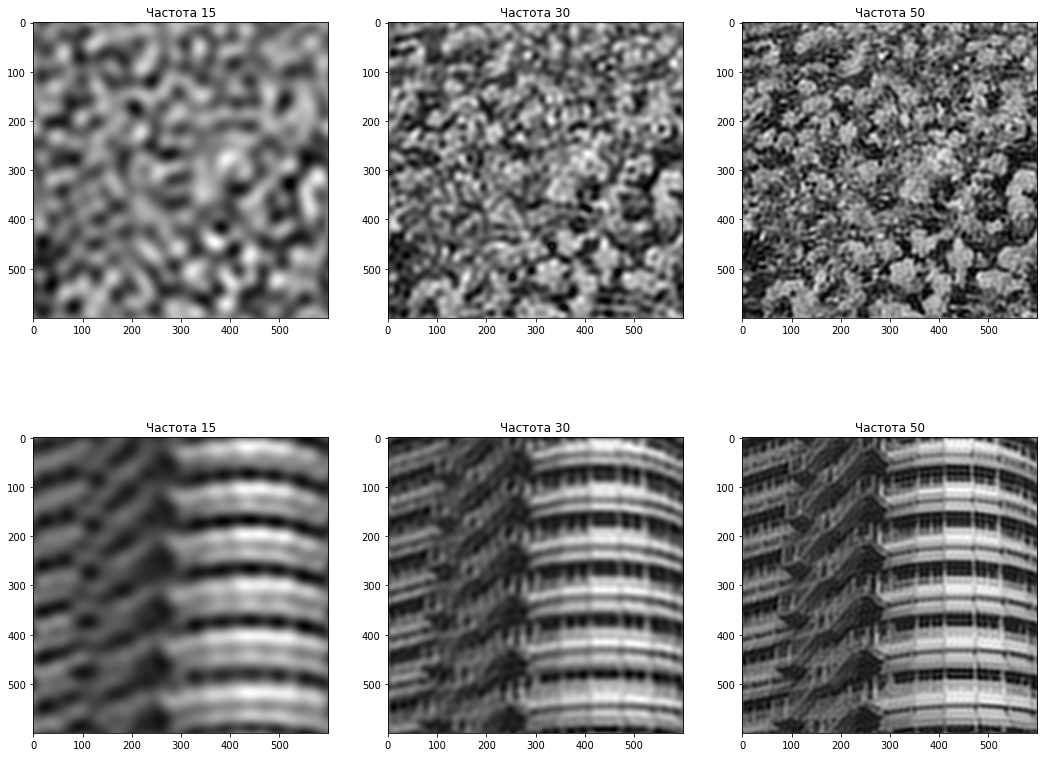

In [ ]:
fig = plt.figure()

fig, ([ax1, ax2, ax3],[ax4, ax5, ax6] ) = plt.subplots(
    nrows=2, ncols=3,
    figsize=(18, 14)
)

ax1.set_title('Частота 15')
ax2.set_title('Частота 30')
ax3.set_title('Частота 50')
ax4.set_title('Частота 15')
ax5.set_title('Частота 30')
ax6.set_title('Частота 50')

image1S15 = idealFilter(15, img1)
image1S30 = idealFilter(30, img1)
image1S50 = idealFilter(50, img1)


image2S15 = idealFilter(15, img2)
image2S30 = idealFilter(30, img2)
image2S50 = idealFilter(50, img2)

ax1.imshow(image1S15, cmap='gray')
ax2.imshow(image1S30,cmap='gray')
ax3.imshow(image1S50,cmap='gray')
ax4.imshow(image2S15,cmap='gray')
ax5.imshow(image2S30,cmap='gray')
ax6.imshow(image2S50, cmap='gray')

plt.show()

In [ ]:
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def GaussianFilter(d, image):
    original = np.fft.fft2(image)
    center = np.fft.fftshift(original)
    LowPassCenter = center * gaussianLP(d,image.shape)
    LowPass = np.fft.ifftshift(LowPassCenter)
    inverse_LowPass = np.fft.ifft2(LowPass)
    low = np.abs(inverse_LowPass)
    return low

<Figure size 432x288 with 0 Axes>

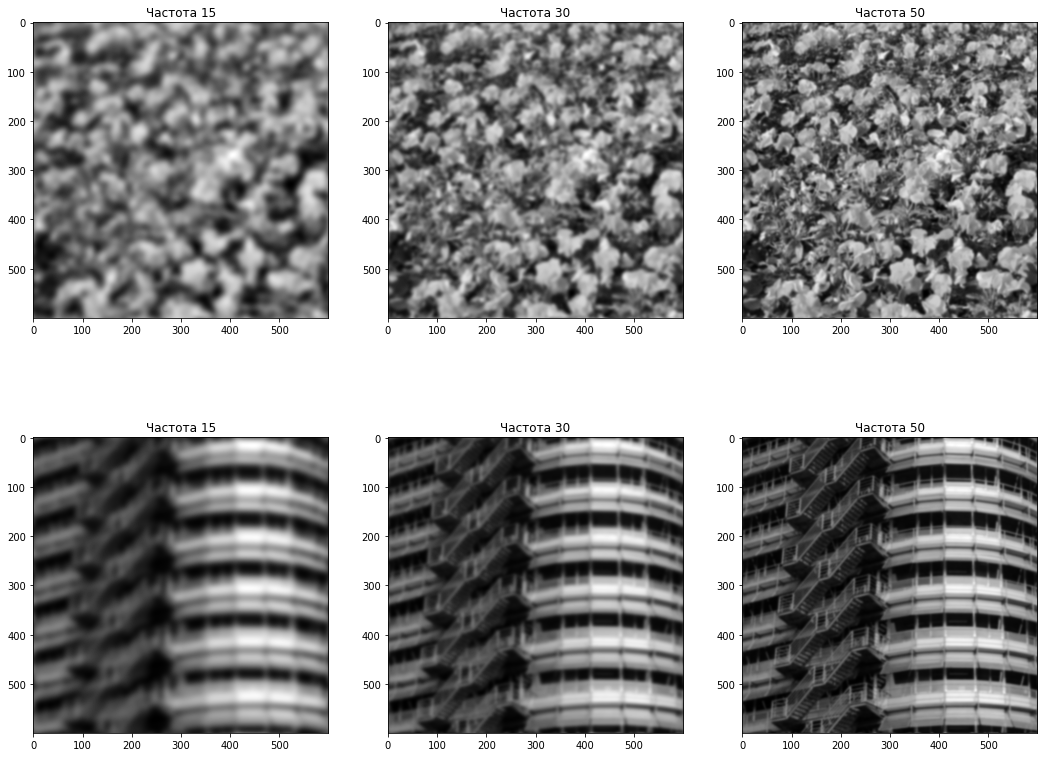

In [ ]:
fig = plt.figure()

fig, ([ax1, ax2, ax3],[ax4, ax5, ax6] ) = plt.subplots(
    nrows=2, ncols=3,
    figsize=(18, 14)
)

ax1.set_title('Частота 15')
ax2.set_title('Частота 30')
ax3.set_title('Частота 50')
ax4.set_title('Частота 15')
ax5.set_title('Частота 30')
ax6.set_title('Частота 50')

image1G15 = GaussianFilter(15, img1)
image1G30 = GaussianFilter(30, img1)
image1G50 = GaussianFilter(50, img1)

image2G15 = GaussianFilter(15, img2)
image2G30 = GaussianFilter(30, img2)
image2G50 = GaussianFilter(50, img2)

ax1.imshow(image1G15, cmap='gray')
ax2.imshow(image1G30,cmap='gray')
ax3.imshow(image1G50,cmap='gray')
ax4.imshow(image2G15,cmap='gray')
ax5.imshow(image2G30,cmap='gray')
ax6.imshow(image2G50, cmap='gray')

plt.show()

In [ ]:
def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def idealLHighFilter(d, image):
    original = np.fft.fft2(image)
    center = np.fft.fftshift(original)
    HighPassCenter = center * idealFilterHP(d,image.shape)
    HighPass = np.fft.ifftshift(HighPassCenter)
    inverse_HighPass = np.fft.ifft2(HighPass)
    high = np.abs(inverse_HighPass)
    return high
    

<Figure size 432x288 with 0 Axes>

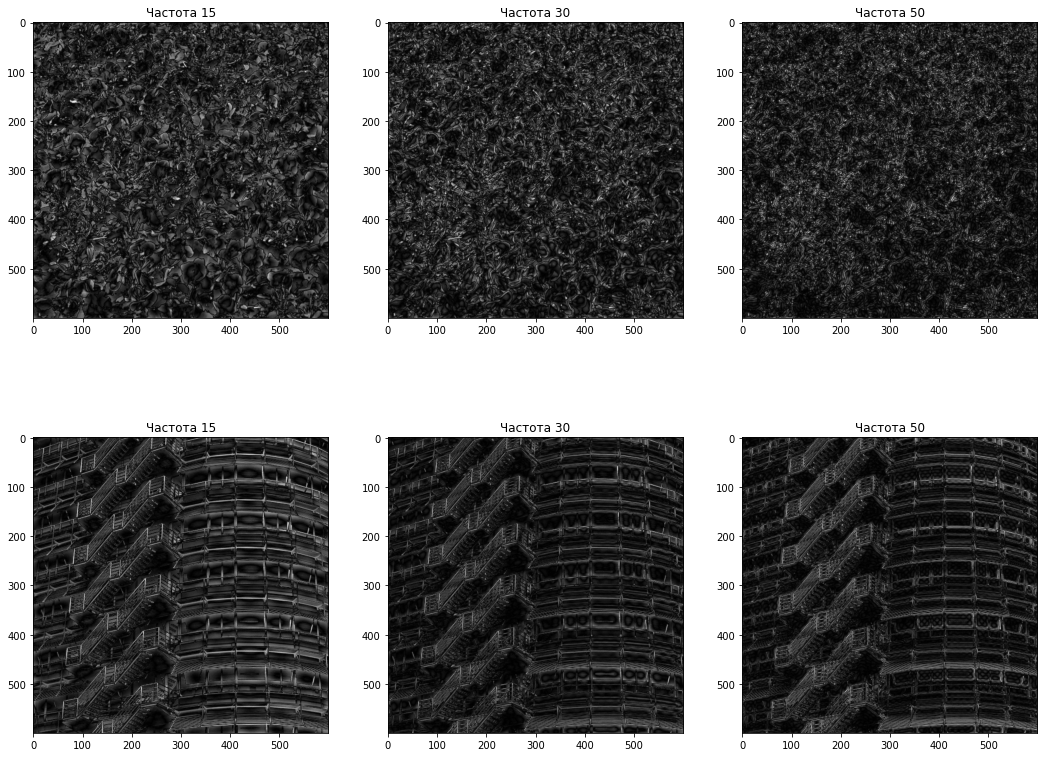

In [ ]:
fig = plt.figure()

fig, ([ax1, ax2, ax3],[ax4, ax5, ax6] ) = plt.subplots(
    nrows=2, ncols=3,
    figsize=(18, 14)
)

ax1.set_title('Частота 15')
ax2.set_title('Частота 30')
ax3.set_title('Частота 50')
ax4.set_title('Частота 15')
ax5.set_title('Частота 30')
ax6.set_title('Частота 50')

image1H15 = idealLHighFilter(15, img1)
image1H30 = idealLHighFilter(30, img1)
image1H50 = idealLHighFilter(50, img1)

image2H15 = idealLHighFilter(15, img2)
image2H30 = idealLHighFilter(30, img2)
image2H50 = idealLHighFilter(50, img2)

ax1.imshow(image1H15, cmap='gray')
ax2.imshow(image1H30,cmap='gray')
ax3.imshow(image1H50,cmap='gray')
ax4.imshow(image2H15,cmap='gray')
ax5.imshow(image2H30,cmap='gray')
ax6.imshow(image2H50, cmap='gray')

plt.show()

In [ ]:
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base
    
def GaussianHighFilter(d, image):
    original = np.fft.fft2(image)
    center = np.fft.fftshift(original)
    HighPassCenter = center * gaussianHP(d,image.shape)
    HighPass = np.fft.ifftshift(HighPassCenter)
    inverse_HighPass = np.fft.ifft2(HighPass)
    high = np.abs(inverse_HighPass)
    return high

<Figure size 432x288 with 0 Axes>

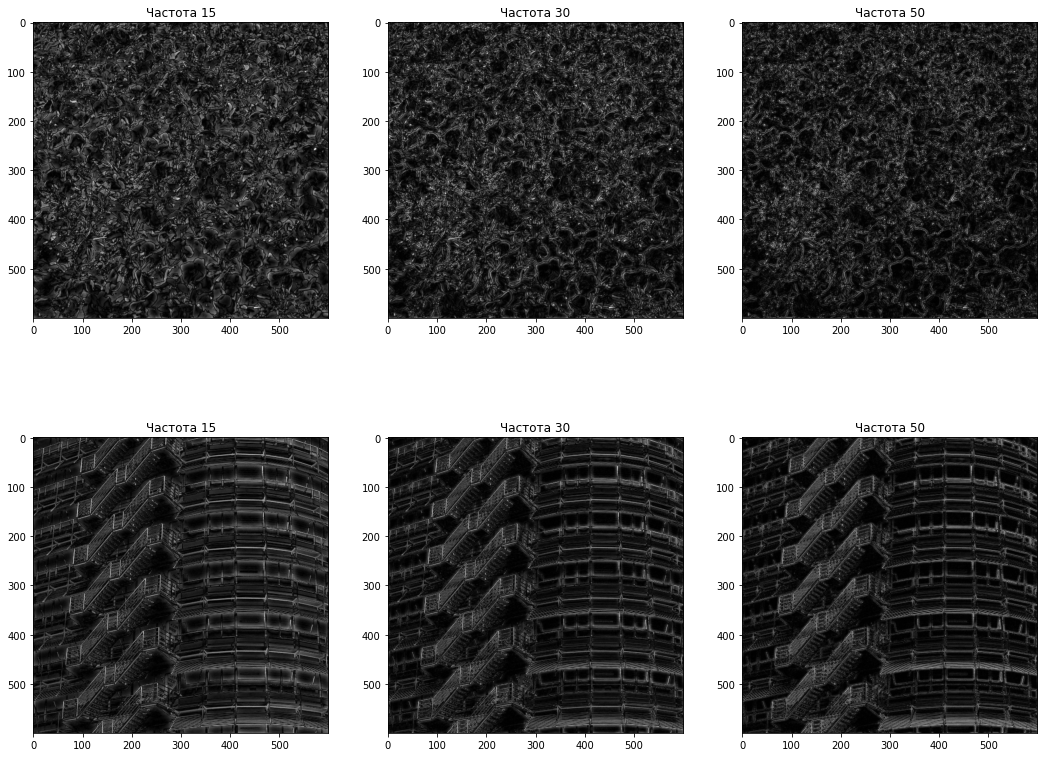

In [ ]:
fig = plt.figure()

fig, ([ax1, ax2, ax3],[ax4, ax5, ax6] ) = plt.subplots(
    nrows=2, ncols=3,
    figsize=(18, 14)
)

ax1.set_title('Частота 15')
ax2.set_title('Частота 30')
ax3.set_title('Частота 50')
ax4.set_title('Частота 15')
ax5.set_title('Частота 30')
ax6.set_title('Частота 50')

image1GH15 = GaussianHighFilter(15, img1)
image1GH30 = GaussianHighFilter(30, img1)
image1GH50 = GaussianHighFilter(50, img1)

image2GH15 = GaussianHighFilter(15, img2)
image2GH30 = GaussianHighFilter(30, img2)
image2GH50 = GaussianHighFilter(50, img2)

ax1.imshow(image1GH15, cmap='gray')
ax2.imshow(image1GH30,cmap='gray')
ax3.imshow(image1GH50,cmap='gray')
ax4.imshow(image2GH15,cmap='gray')
ax5.imshow(image2GH30,cmap='gray')
ax6.imshow(image2GH50, cmap='gray')

plt.show()